In [3]:
#importing libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#make plot appear in notebook 
%matplotlib inline

#importing sckit-learn models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score



In [4]:
#Load data
df = pd.read_csv("AQI_Data.csv")
df.head(10)

PM2.5   PM10    PM1   NO2   SO2    CO    O3  Temperature  Humidity  \
0   84.8  110.3   56.5  21.8   2.2  1.22  33.2         25.5        29   
1   53.1   67.0   32.4  46.3  18.1  2.79  19.5         25.0        39   
2   92.4  146.1   58.4  76.0  12.7  1.92  27.3         19.2        80   
3  136.2  221.1   95.5  25.2   8.2  2.81  34.2         36.7        65   
4   48.3   58.9   40.6   5.0   3.4  1.28  21.2         21.6        57   
5   48.3   85.1   37.3  58.6   4.2  2.44  22.9         28.3        50   
6  139.0  171.1  104.7  20.9  26.4  3.14  20.7         32.6        70   
7   98.4  150.0   67.7   5.0  10.0  2.81  44.4         30.1        43   
8   36.5   59.4   32.1  21.3  16.3  0.41  33.4         27.7        66   
9   87.1  150.1   62.7  34.5   3.7  1.25  29.4         19.5        45   

   WindSpeed  WindDirection  TimeOfDay  DayOfWeek  Pressure  \
0        1.3             54         16          1      1003   
1        3.6            128         10          4      1013   
2        0.4             84         16          0       997   
3        2.5            213          9          3      1019   
4        1.4            114         17          1      1009   
5        0.9            313         22          0      1006   
6        5.9            292          5          6       998   
7        2.6             48         15          5       985   
8        2.9             66         17          0      1000   
9        3.7            274         19          2      1021   

                        AQI_Class  
0                        Moderate  
1                        Moderate  
2                        Moderate  
3  Unhealthy for Sensitive Groups  
4                            Good  
5                        Moderate  
6  Unhealthy for Sensitive Groups  
7                        Moderate  
8                            Good  
9                        Moderate

In [5]:
df.shape #(row, column)

(1000, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5          1000 non-null   float64
 1   PM10           1000 non-null   float64
 2   PM1            1000 non-null   float64
 3   NO2            1000 non-null   float64
 4   SO2            1000 non-null   float64
 5   CO             1000 non-null   float64
 6   O3             1000 non-null   float64
 7   Temperature    1000 non-null   float64
 8   Humidity       1000 non-null   int64  
 9   WindSpeed      1000 non-null   float64
 10  WindDirection  1000 non-null   int64  
 11  TimeOfDay      1000 non-null   int64  
 12  DayOfWeek      1000 non-null   int64  
 13  Pressure       1000 non-null   int64  
 14  AQI_Class      1000 non-null   object 
dtypes: float64(9), int64(5), object(1)
memory usage: 117.3+ KB


## Data preprocessing

In [12]:
# determining whether there are missing values 
df.isna().sum()

PM2.5            0
PM10             0
PM1              0
NO2              0
SO2              0
CO               0
O3               0
Temperature      0
Humidity         0
WindSpeed        0
WindDirection    0
TimeOfDay        0
DayOfWeek        0
Pressure         0
AQI_Class        0
dtype: int64

In [14]:
#converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target = df['AQI_Class']
encoded_series = label_encoder.fit_transform(target)
df['AQI_Class']= encoded_series

In [16]:
df.head(10)

PM2.5   PM10    PM1   NO2   SO2    CO    O3  Temperature  Humidity  \
0   84.8  110.3   56.5  21.8   2.2  1.22  33.2         25.5        29   
1   53.1   67.0   32.4  46.3  18.1  2.79  19.5         25.0        39   
2   92.4  146.1   58.4  76.0  12.7  1.92  27.3         19.2        80   
3  136.2  221.1   95.5  25.2   8.2  2.81  34.2         36.7        65   
4   48.3   58.9   40.6   5.0   3.4  1.28  21.2         21.6        57   
5   48.3   85.1   37.3  58.6   4.2  2.44  22.9         28.3        50   
6  139.0  171.1  104.7  20.9  26.4  3.14  20.7         32.6        70   
7   98.4  150.0   67.7   5.0  10.0  2.81  44.4         30.1        43   
8   36.5   59.4   32.1  21.3  16.3  0.41  33.4         27.7        66   
9   87.1  150.1   62.7  34.5   3.7  1.25  29.4         19.5        45   

   WindSpeed  WindDirection  TimeOfDay  DayOfWeek  Pressure  AQI_Class  
0        1.3             54         16          1      1003          1  
1        3.6            128         10          4      1013          1  
2        0.4             84         16          0       997          1  
3        2.5            213          9          3      1019          2  
4        1.4            114         17          1      1009          0  
5        0.9            313         22          0      1006          1  
6        5.9            292          5          6       998          2  
7        2.6             48         15          5       985          1  
8        2.9             66         17          0      1000          0  
9        3.7            274         19          2      1021          1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5          1000 non-null   float64
 1   PM10           1000 non-null   float64
 2   PM1            1000 non-null   float64
 3   NO2            1000 non-null   float64
 4   SO2            1000 non-null   float64
 5   CO             1000 non-null   float64
 6   O3             1000 non-null   float64
 7   Temperature    1000 non-null   float64
 8   Humidity       1000 non-null   int64  
 9   WindSpeed      1000 non-null   float64
 10  WindDirection  1000 non-null   int64  
 11  TimeOfDay      1000 non-null   int64  
 12  DayOfWeek      1000 non-null   int64  
 13  Pressure       1000 non-null   int64  
 14  AQI_Class      1000 non-null   int32  
dtypes: float64(9), int32(1), int64(5)
memory usage: 113.4 KB


In [20]:
df.describe()

PM2.5         PM10          PM1         NO2          SO2  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean     63.843900    96.125900    47.779000    42.13300    10.081000   
std      44.203847    67.706103    33.456846    27.57687     6.829017   
min       5.000000     6.000000     3.000000     5.00000     1.000000   
25%      27.650000    40.875000    20.950000    18.77500     4.200000   
50%      61.250000    91.050000    45.650000    40.45000     9.700000   
75%      92.400000   139.600000    71.200000    60.65000    14.700000   
max     252.600000   363.600000   168.800000   157.80000    35.900000   

                CO           O3  Temperature     Humidity    WindSpeed  \
count  1000.000000  1000.000000   1000.00000  1000.000000  1000.000000   
mean      1.519310    26.101100     27.86770    60.386000     2.076300   
std       0.921045    17.387372      5.20847    19.912195     1.345406   
min       0.100000     5.000000     15.00000    10.000000     0.000000   
25%       0.837500    10.450000     24.20000    47.000000     1.100000   
50%       1.480000    23.900000     27.80000    60.000000     2.000000   
75%       2.160000    38.325000     31.50000    74.250000     3.000000   
max       4.610000    80.000000     40.00000   100.000000     6.700000   

       WindDirection    TimeOfDay    DayOfWeek     Pressure    AQI_Class  
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      174.287000    11.564000     2.961000  1010.109000     0.678000  
std       104.072646     6.759852     2.007862    10.068788     0.598895  
min         0.000000     0.000000     0.000000   980.000000     0.000000  
25%        82.750000     6.000000     1.000000  1004.000000     0.000000  
50%       178.000000    12.000000     3.000000  1010.000000     1.000000  
75%       261.250000    17.000000     5.000000  1016.250000     1.000000  
max       359.000000    23.000000     6.000000  1044.000000     2.000000

In [22]:
#determine how many of each class is present in the target 
df["AQI_Class"].value_counts()

AQI_Class
1    538
0    392
2     70
Name: count, dtype: int64

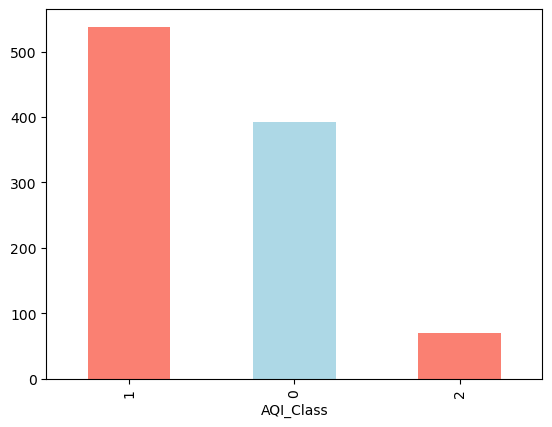

In [24]:
#
df["AQI_Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Text(0.5, 0.98, 'Feature Distributions')

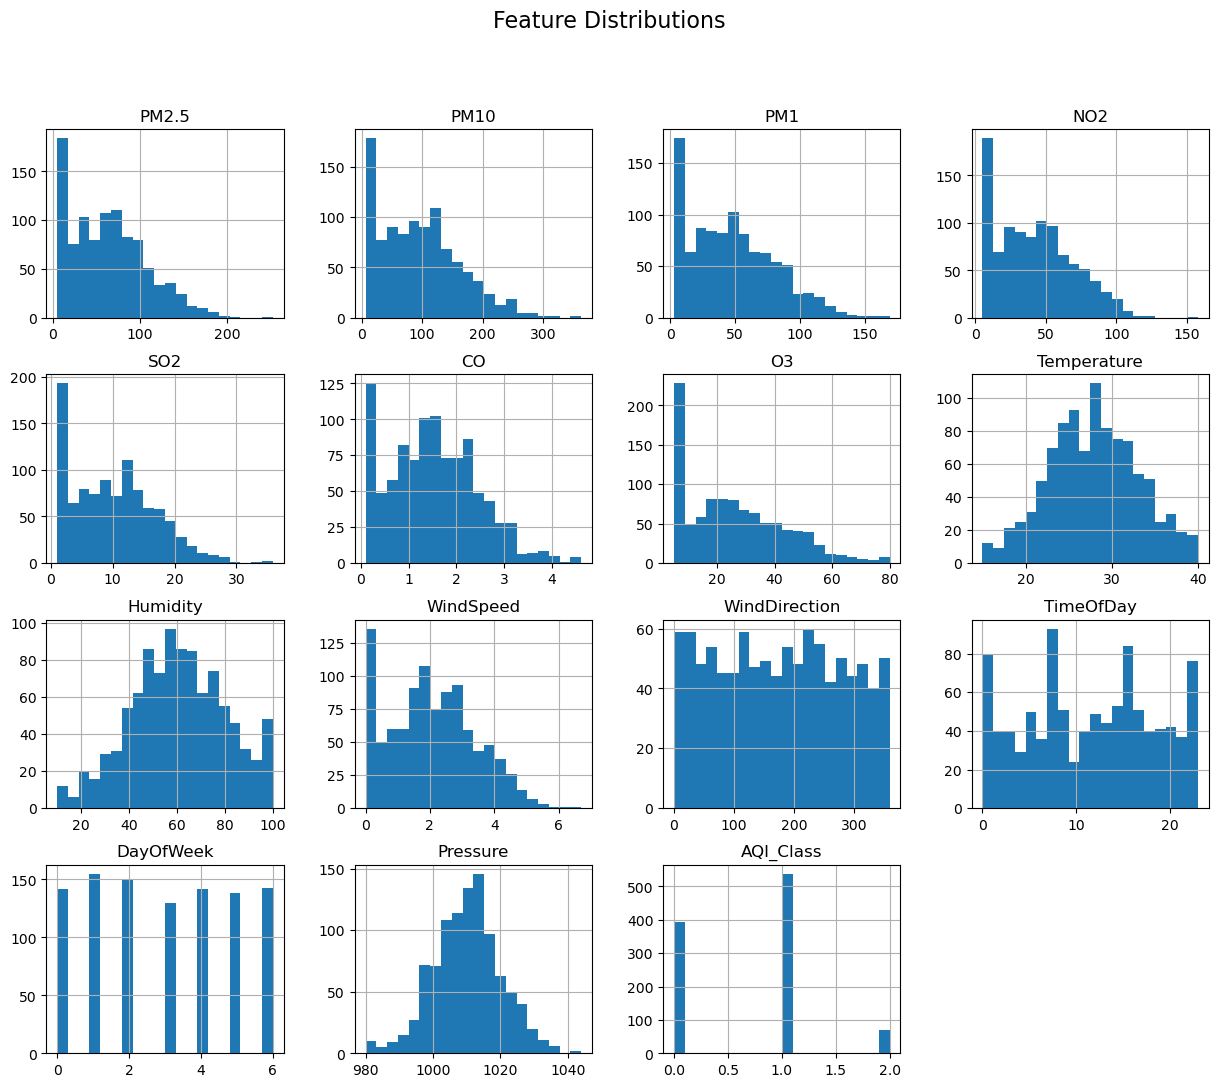

In [26]:
df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)

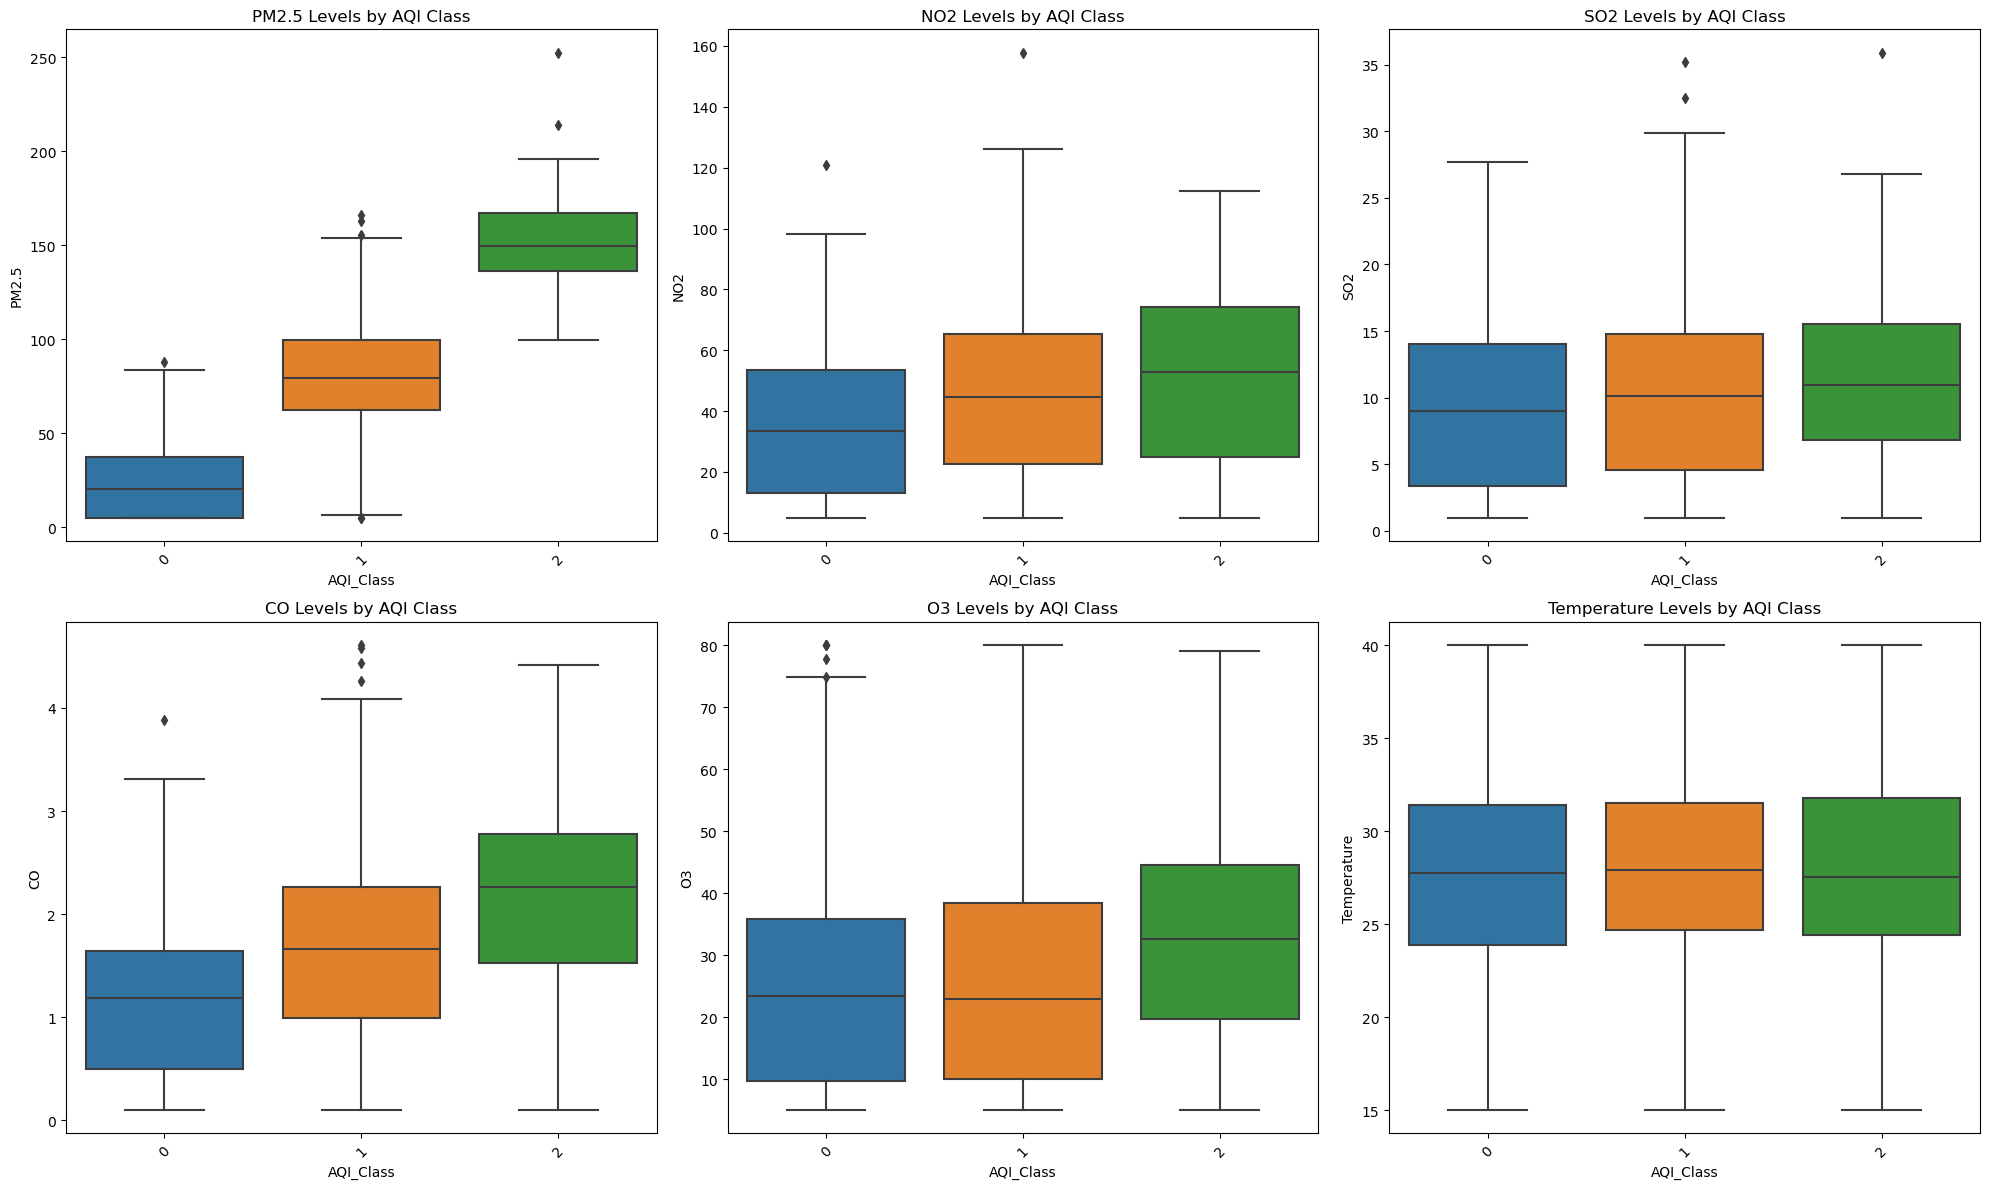

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x3 grid subplot
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()  # Flatten for easy indexing

# List of pollutants + Temperature to plot
pollutants = ['PM2.5', 'NO2', 'SO2', 'CO', 'O3', 'Temperature']
titles = [f"{var} Levels by AQI Class" for var in pollutants]

# Generate each boxplot
for i, (var, title) in enumerate(zip(pollutants, titles)):
    sns.boxplot(x='AQI_Class', y=var, data=df, ax=axes[i])
    axes[i].set_title(title)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels if crowded

# Remove any empty subplots (if fewer than 6)
for j in range(len(pollutants), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [29]:
# Make a correlation matrix
df.corr()

PM2.5      PM10       PM1       NO2       SO2        CO  \
PM2.5          1.000000  0.980529  0.979963 -0.021847  0.049917  0.061041   
PM10           0.980529  1.000000  0.958895 -0.022309  0.043263  0.076884   
PM1            0.979963  0.958895  1.000000 -0.028875  0.049459  0.056130   
NO2           -0.021847 -0.022309 -0.028875  1.000000  0.023688 -0.006805   
SO2            0.049917  0.043263  0.049459  0.023688  1.000000 -0.010909   
CO             0.061041  0.076884  0.056130 -0.006805 -0.010909  1.000000   
O3             0.030500  0.038988  0.025268 -0.063590  0.050119 -0.025229   
Temperature    0.020435  0.028398  0.010118 -0.044205  0.070893  0.046469   
Humidity       0.024885  0.029497  0.021783 -0.019175 -0.015758  0.007995   
WindSpeed     -0.008544  0.002812 -0.006894 -0.006281  0.041168  0.018882   
WindDirection  0.021704  0.023349  0.023207 -0.010763  0.006977  0.040331   
TimeOfDay     -0.014059 -0.016158 -0.011519  0.015966  0.007373  0.031822   
DayOfWeek      0.038478  0.038875  0.047951  0.028364  0.006261 -0.025455   
Pressure      -0.014292 -0.020336 -0.008312  0.038672  0.043116  0.027152   
AQI_Class      0.813425  0.808629  0.794553  0.173084  0.079491  0.325171   

                     O3  Temperature  Humidity  WindSpeed  WindDirection  \
PM2.5          0.030500     0.020435  0.024885  -0.008544       0.021704   
PM10           0.038988     0.028398  0.029497   0.002812       0.023349   
PM1            0.025268     0.010118  0.021783  -0.006894       0.023207   
NO2           -0.063590    -0.044205 -0.019175  -0.006281      -0.010763   
SO2            0.050119     0.070893 -0.015758   0.041168       0.006977   
CO            -0.025229     0.046469  0.007995   0.018882       0.040331   
O3             1.000000     0.026653  0.003900  -0.011192      -0.008377   
Temperature    0.026653     1.000000 -0.015813  -0.012800       0.021088   
Humidity       0.003900    -0.015813  1.000000  -0.021139      -0.033786   
WindSpeed     -0.011192    -0.012800 -0.021139   1.000000      -0.005199   
WindDirection -0.008377     0.021088 -0.033786  -0.005199       1.000000   
TimeOfDay     -0.036654    -0.025442 -0.023118  -0.026232      -0.019103   
DayOfWeek     -0.020984    -0.010678 -0.020479  -0.032543       0.035171   
Pressure       0.012269    -0.031551  0.020100  -0.009400      -0.020376   
AQI_Class      0.058932     0.029587  0.038133  -0.026128       0.041410   

               TimeOfDay  DayOfWeek  Pressure  AQI_Class  
PM2.5          -0.014059   0.038478 -0.014292   0.813425  
PM10           -0.016158   0.038875 -0.020336   0.808629  
PM1            -0.011519   0.047951 -0.008312   0.794553  
NO2             0.015966   0.028364  0.038672   0.173084  
SO2             0.007373   0.006261  0.043116   0.079491  
CO              0.031822  -0.025455  0.027152   0.325171  
O3             -0.036654  -0.020984  0.012269   0.058932  
Temperature    -0.025442  -0.010678 -0.031551   0.029587  
Humidity       -0.023118  -0.020479  0.020100   0.038133  
WindSpeed      -0.026232  -0.032543 -0.009400  -0.026128  
WindDirection  -0.019103   0.035171 -0.020376   0.041410  
TimeOfDay       1.000000   0.032007  0.031363   0.010782  
DayOfWeek       0.032007   1.000000  0.045515   0.007860  
Pressure        0.031363   0.045515  1.000000   0.025746  
AQI_Class       0.010782   0.007860  0.025746   1.000000

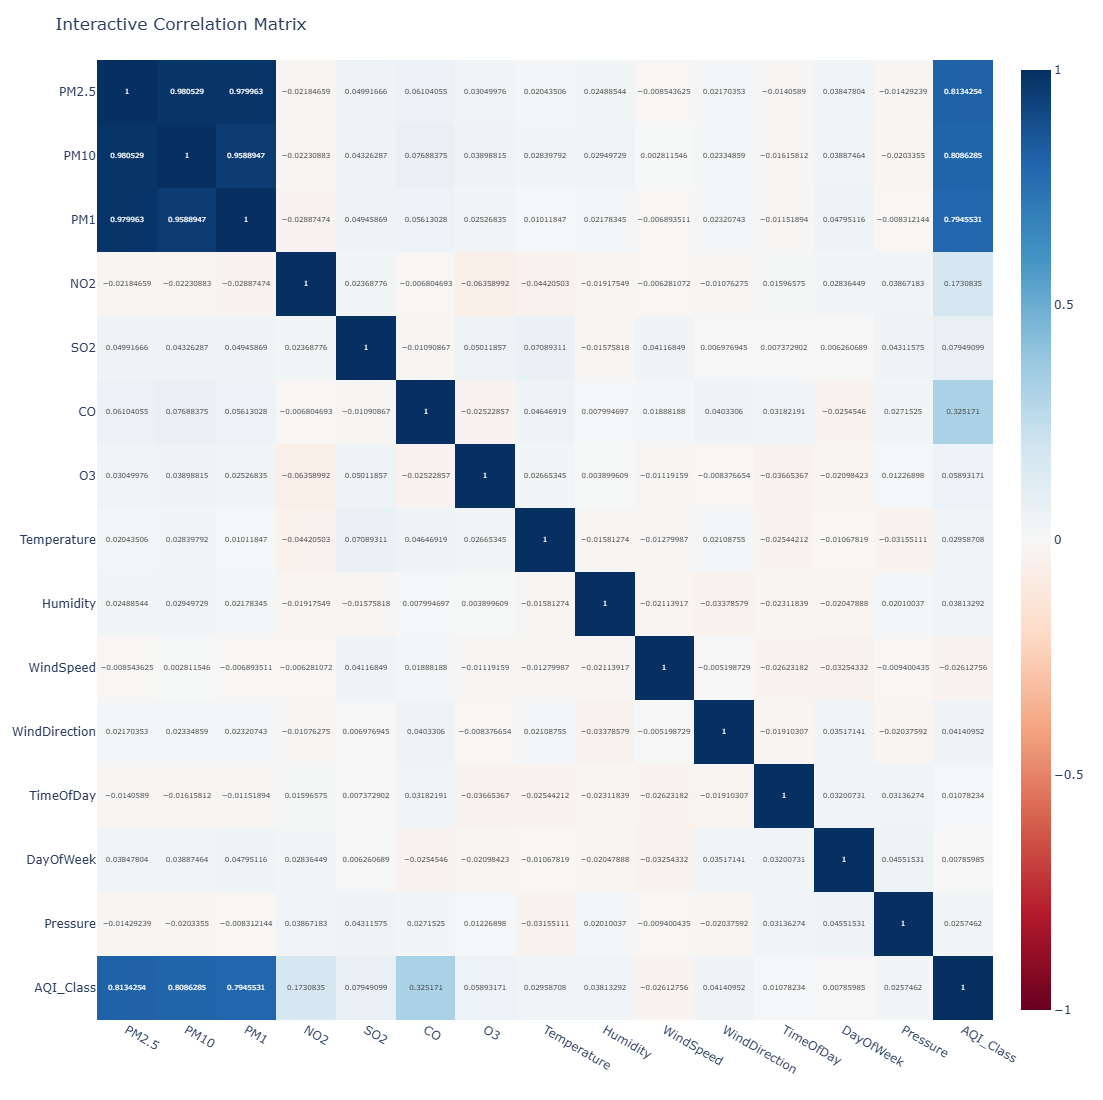

In [32]:
import plotly.express as px

fig = px.imshow(
    df.corr(),
    text_auto=True,          # Auto-annotate
    color_continuous_scale="RdBu",  # Red-Blue divergent
    zmin=-1, zmax=1,        # Fixed scale
    aspect="auto"           # Adjust aspect ratio
)
fig.update_layout(
    title="Interactive Correlation Matrix",
    width=1100,
    height=1100
)
fig.show()

<Axes: xlabel='PM2.5', ylabel='PM10'>

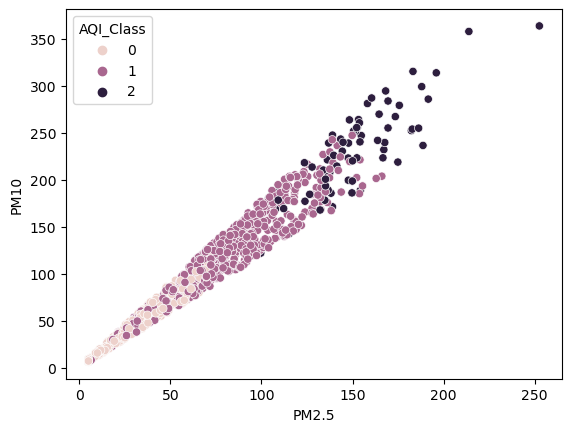

In [33]:
sns.scatterplot(x='PM2.5', y='PM10', hue='AQI_Class', data=df)


In [34]:
# Calculate correlation matrix (numeric only)
corr_matrix = df.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features (correlation > 0.9):", to_drop)

# Drop them
df_reduced = df.drop(columns=to_drop)


Highly correlated features (correlation > 0.9): ['PM10', 'PM1']


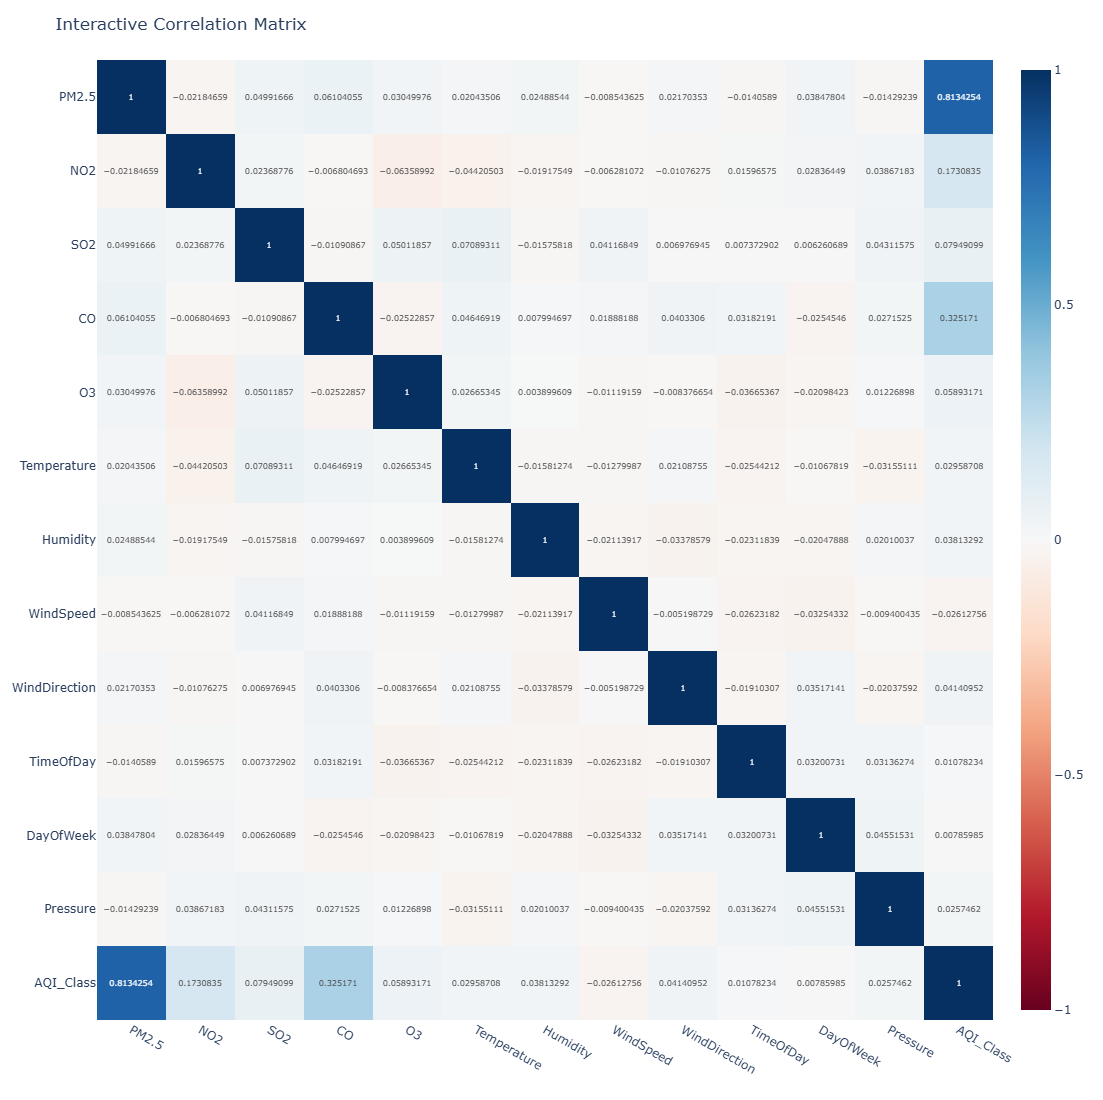

In [35]:
import plotly.express as px

fig = px.imshow(
    df_reduced.corr(),
    text_auto=True,          # Auto-annotate
    color_continuous_scale="RdBu",  # Red-Blue divergent
    zmin=-1, zmax=1,        # Fixed scale
    aspect="auto"           # Adjust aspect ratio
)
fig.update_layout(
    title="Interactive Correlation Matrix",
    width=1100,
    height=1100
)
fig.show()

In [40]:
df_reduced.head()

PM2.5   NO2   SO2    CO    O3  Temperature  Humidity  WindSpeed  \
0   84.8  21.8   2.2  1.22  33.2         25.5        29        1.3   
1   53.1  46.3  18.1  2.79  19.5         25.0        39        3.6   
2   92.4  76.0  12.7  1.92  27.3         19.2        80        0.4   
3  136.2  25.2   8.2  2.81  34.2         36.7        65        2.5   
4   48.3   5.0   3.4  1.28  21.2         21.6        57        1.4   

   WindDirection  TimeOfDay  DayOfWeek  Pressure  AQI_Class  
0             54         16          1      1003          1  
1            128         10          4      1013          1  
2             84         16          0       997          1  
3            213          9          3      1019          2  
4            114         17          1      1009          0

In [42]:
df_reduced.shape

(1000, 13)

In [44]:
# Split data into X and y
X = df_reduced.drop("AQI_Class", axis=1)

y = df_reduced["AQI_Class"]

In [46]:
#scaling our dataset,  transforming your features to fit within a specific range or distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

PM2.5       NO2       SO2        CO        O3  Temperature  Humidity  \
0  0.474316 -0.737690 -1.154623 -0.325130  0.408483    -0.454814 -1.577009   
1 -0.243175  0.151181  1.174841  1.380308 -0.379839    -0.550860 -1.074553   
2  0.646333  1.228709  0.383702  0.435256  0.068987    -1.664988  0.985517   
3  1.637692 -0.614336 -0.275580  1.402033  0.466025     1.696606  0.231833   
4 -0.351817 -1.347201 -0.978815 -0.259954 -0.282018    -1.203969 -0.170132   

   WindSpeed  WindDirection  TimeOfDay  DayOfWeek  Pressure  
0  -0.577289      -1.156377   0.656556  -0.977149 -0.706397  
1   1.133087      -0.444979  -0.231482   0.517725  0.287269  
2  -1.246567      -0.867972   0.656556  -1.475441 -1.302596  
3   0.315081       0.372167  -0.379488   0.019433  0.883468  
4  -0.502925      -0.579568   0.804562  -0.977149 -0.110197

In [50]:
X= X_scaled_df
X

PM2.5       NO2       SO2        CO        O3  Temperature  Humidity  \
0    0.474316 -0.737690 -1.154623 -0.325130  0.408483    -0.454814 -1.577009   
1   -0.243175  0.151181  1.174841  1.380308 -0.379839    -0.550860 -1.074553   
2    0.646333  1.228709  0.383702  0.435256  0.068987    -1.664988  0.985517   
3    1.637692 -0.614336 -0.275580  1.402033  0.466025     1.696606  0.231833   
4   -0.351817 -1.347201 -0.978815 -0.259954 -0.282018    -1.203969 -0.170132   
..        ...       ...       ...       ...       ...          ...       ...   
995 -0.406138  0.579289  0.222544 -0.292542 -1.214195     0.601687 -1.677500   
996  1.947775  2.429591  0.632765 -0.835676  1.628369    -0.704532  1.940184   
997  0.637279 -1.347201 -1.330432  0.391805 -0.776877    -0.070632  0.131342   
998 -0.734328  1.294014 -0.026518  1.195643 -1.214195     1.408469 -0.119886   
999  0.560324  1.170660  0.178592 -1.541749  1.467252    -0.608487 -0.220377   

     WindSpeed  WindDirection  TimeOfDay  DayOfWeek  Pressure  
0    -0.577289      -1.156377   0.656556  -0.977149 -0.706397  
1     1.133087      -0.444979  -0.231482   0.517725  0.287269  
2    -1.246567      -0.867972   0.656556  -1.475441 -1.302596  
3     0.315081       0.372167  -0.379488   0.019433  0.883468  
4    -0.502925      -0.579568   0.804562  -0.977149 -0.110197  
..         ...            ...        ...        ...       ...  
995  -0.428561      -1.598597   1.544593   1.514307 -1.103863  
996   1.356179       1.073951  -1.711544   0.019433  0.386635  
997   1.207451      -0.839132   0.952568   1.514307  1.579033  
998   0.091988       1.371969   0.212537   0.019433 -0.408297  
999  -0.577289      -1.502462  -1.415532   1.514307  0.684735  

[1000 rows x 12 columns]

In [52]:
y

0      1
1      1
2      1
3      2
4      0
      ..
995    0
996    2
997    1
998    1
999    1
Name: AQI_Class, Length: 1000, dtype: int32

In [54]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [56]:
X_train

PM2.5       NO2       SO2        CO        O3  Temperature  Humidity  \
29  -0.417455 -1.013421 -1.125322  1.347720 -0.178443    -1.933915  0.834781   
535 -0.032681 -0.117295 -0.011867  0.891488 -0.690565    -0.147468  0.583553   
695 -0.437826 -1.347201 -0.509992  0.478707  1.622615    -0.589278  1.990430   
557 -0.575892 -0.483727 -0.890910 -0.596697 -1.064586     0.659314 -1.526763   
836  1.667116  0.492216  0.251846  0.098514 -1.214195     0.467223 -0.672588   
..        ...       ...       ...       ...       ...          ...       ...   
106  2.047364  2.113951 -1.081370  0.706823  0.005691    -2.106797 -0.672588   
270  1.544894 -0.991653  0.369052  0.185415 -0.817157     1.081914  0.834781   
860  0.141599  1.108984 -1.330432 -0.705324 -1.214195    -0.838996  0.985517   
435 -0.003257 -0.792110 -1.330432  1.336857 -0.552464    -0.493232  1.487974   
102 -0.474040  0.601058  1.086937  0.120239 -0.184197    -1.050296  0.432816   

     WindSpeed  WindDirection  TimeOfDay  DayOfWeek  Pressure  
29    0.166353      -0.454593  -0.379488  -1.475441  0.486002  
535   2.174185       1.679600  -0.527494  -0.478858 -0.308930  
695   0.315081       0.718252  -0.675501  -1.475441 -1.004496  
557   0.612538       1.496944  -0.971513   1.514307  1.479667  
836  -0.354197      -0.166188  -0.527494  -0.977149 -2.494994  
..         ...            ...        ...        ...       ...  
106  -1.544023       0.977816   0.508549  -1.475441 -0.905130  
270   0.240717       1.381582   0.656556  -0.977149 -0.010831  
860   0.835630       0.843227  -0.971513  -0.478858  0.585368  
435  -0.354197       1.420036  -0.083476   0.517725  0.486002  
102  -0.205468       0.189511   1.100575  -0.478858  1.181567  

[800 rows x 12 columns]

In [58]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(class_weight='balanced'),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(class_weight='balanced')}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [60]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.98, 'KNN': 0.765, 'Random Forest': 0.92}

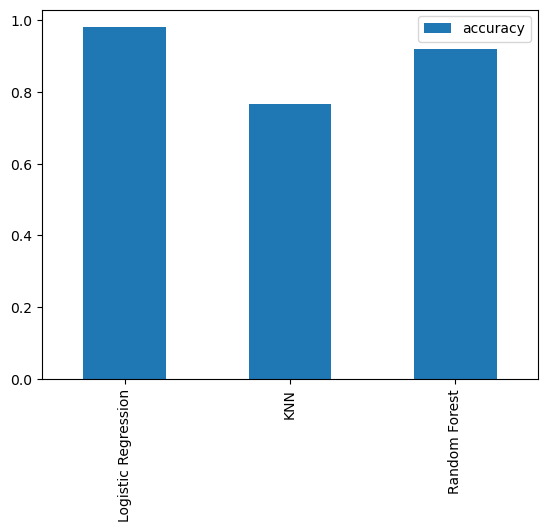

In [62]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [64]:
# tune the n_neighbors hyperparameter for the K-Nearest Neighbors (KNN) algorithm and evaluate its performance on both the training and testing datasets

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [66]:
train_scores

[1.0,
 0.86625,
 0.89875,
 0.86,
 0.8725,
 0.85625,
 0.87,
 0.855,
 0.86,
 0.855,
 0.85875,
 0.85,
 0.845,
 0.84375,
 0.8525,
 0.8525,
 0.8575,
 0.86125,
 0.865,
 0.8675]

In [68]:
test_scores

[0.695,
 0.705,
 0.745,
 0.75,
 0.765,
 0.78,
 0.775,
 0.795,
 0.785,
 0.795,
 0.78,
 0.785,
 0.755,
 0.785,
 0.795,
 0.81,
 0.8,
 0.82,
 0.795,
 0.835]

Maximum KNN score on the test data: 83.50%


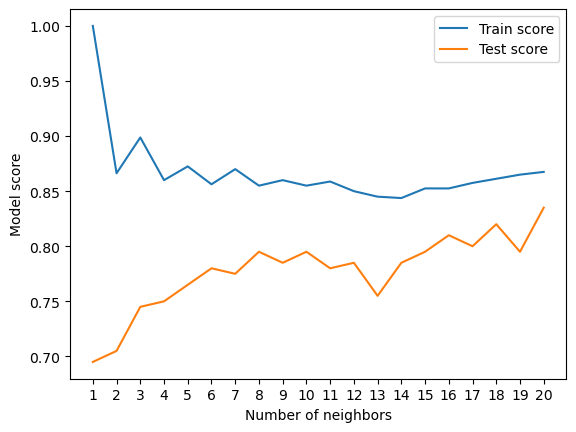

In [70]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [72]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [74]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [78]:
rs_log_reg.score(X_test, y_test)

0.985

In [80]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [128]:
# Cross-validation results for RandomizedSearchCV
cv_results = rs_rf.cv_results_

print("RandomizedSearchCV cross-validation scores (Random Forest):")
for mean, std, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f} --> Params: {params}")

print("\nBest CV Score:", rs_rf.best_score_)
print("Best Parameters:", rs_rf.best_params_)


RandomizedSearchCV cross-validation scores (Random Forest):
Mean: 0.8512, Std: 0.0286 --> Params: {'n_estimators': 10, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_depth': None}
Mean: 0.8475, Std: 0.0318 --> Params: {'n_estimators': 510, 'min_samples_split': 18, 'min_samples_leaf': 19, 'max_depth': 5}
Mean: 0.8475, Std: 0.0339 --> Params: {'n_estimators': 310, 'min_samples_split': 2, 'min_samples_leaf': 19, 'max_depth': 5}
Mean: 0.8513, Std: 0.0286 --> Params: {'n_estimators': 560, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_depth': 5}
Mean: 0.8538, Std: 0.0249 --> Params: {'n_estimators': 610, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_depth': 5}
Mean: 0.8437, Std: 0.0274 --> Params: {'n_estimators': 610, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_depth': 3}
Mean: 0.8850, Std: 0.0261 --> Params: {'n_estimators': 710, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_depth': 10}
Mean: 0.8625, Std: 0.0262 --> Params: {'n_estimators': 260, 'min_sa

In [81]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [84]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.93

In [86]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [126]:
# Cross-validation results for GridSearchCV
cv_results = gs_log_reg.cv_results_

# Print mean and std for each fold
print("GridSearchCV cross-validation scores (Logistic Regression):")
for mean, std, params in zip(cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f} --> Params: {params}")

# Best cross-validated score
print("\nBest CV Score:", gs_log_reg.best_score_)
print("Best Parameters:", gs_log_reg.best_params_)


GridSearchCV cross-validation scores (Logistic Regression):
Mean: 0.8762, Std: 0.0150 --> Params: {'C': 0.0001, 'solver': 'liblinear'}
Mean: 0.8762, Std: 0.0150 --> Params: {'C': 0.00018873918221350977, 'solver': 'liblinear'}
Mean: 0.8762, Std: 0.0150 --> Params: {'C': 0.0003562247890262444, 'solver': 'liblinear'}
Mean: 0.8750, Std: 0.0143 --> Params: {'C': 0.0006723357536499335, 'solver': 'liblinear'}
Mean: 0.8750, Std: 0.0131 --> Params: {'C': 0.0012689610031679222, 'solver': 'liblinear'}
Mean: 0.8750, Std: 0.0131 --> Params: {'C': 0.002395026619987486, 'solver': 'liblinear'}
Mean: 0.8750, Std: 0.0131 --> Params: {'C': 0.004520353656360241, 'solver': 'liblinear'}
Mean: 0.8787, Std: 0.0085 --> Params: {'C': 0.008531678524172805, 'solver': 'liblinear'}
Mean: 0.8812, Std: 0.0079 --> Params: {'C': 0.01610262027560939, 'solver': 'liblinear'}
Mean: 0.8825, Std: 0.0061 --> Params: {'C': 0.03039195382313198, 'solver': 'liblinear'}
Mean: 0.8850, Std: 0.0064 --> Params: {'C': 0.057361525104486

🔍 Final Model Comparison:


Accuracy
Tuned Logistic Regression     0.985
Tuned Random Forest           0.930

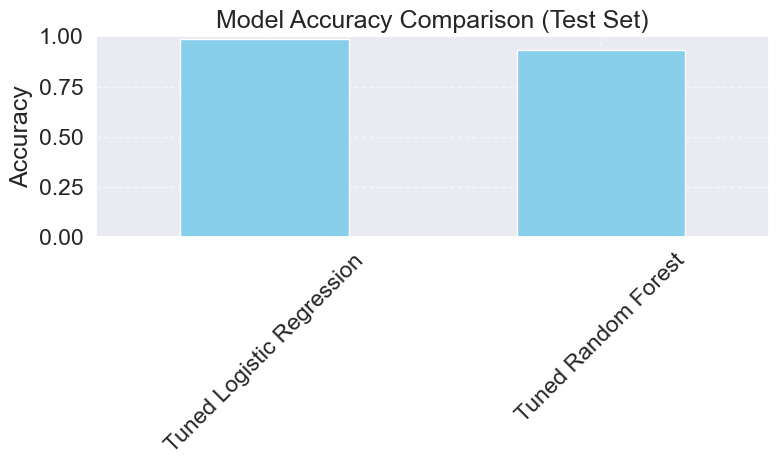

In [130]:
# Create a dictionary of final model scores
model_comparison = {
    "Tuned Logistic Regression": gs_log_reg.score(X_test, y_test),
    "Tuned Random Forest": rs_rf.score(X_test, y_test),
    # Add KNN if you tuned it and have final model
    # "Tuned KNN": knn_final.score(X_test, y_test),
}

# Convert to DataFrame for easier visualization
model_scores_df = pd.DataFrame(model_comparison, index=["Accuracy"]).T

# Display table
print("🔍 Final Model Comparison:")
display(model_scores_df)

# Plot as bar chart
model_scores_df.plot(kind="bar", legend=False, figsize=(8,5), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Test Set)")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


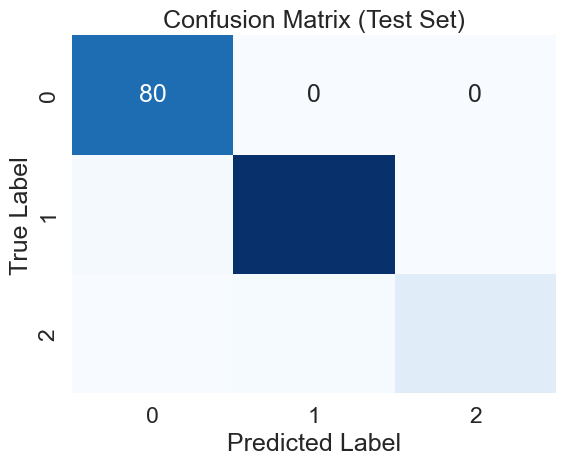

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


In [172]:
from sklearn.metrics import classification_report

# Print classification report
print("📄 Classification Report:")
print(classification_report(y_test, y_preds))


📄 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       0.99      0.98      0.99       107
           2       1.00      0.92      0.96        13

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



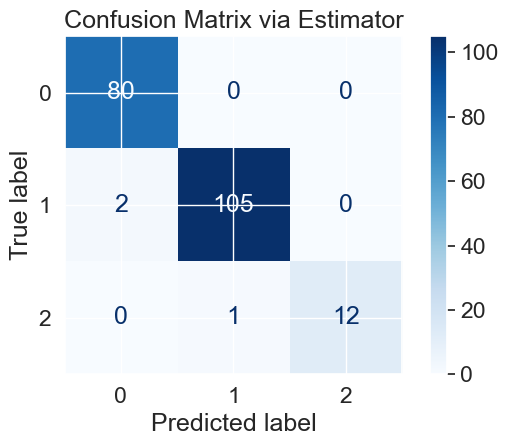

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix via Estimator")
plt.tight_layout()
plt.show()


In [132]:
# Based on accuracy/F1-score, we select Logistic Regression as the final model
final_model = gs_log_reg  # You could also choose rs_rf based on earlier comparison

print("✅ Final selected model: Logistic Regression (GridSearchCV)")


✅ Final selected model: Logistic Regression (GridSearchCV)


In [134]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [136]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.985

In [138]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [140]:
# Import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_preds))
print("Precision:", precision_score(y_test, y_preds, average='weighted'))
print("Recall:", recall_score(y_test, y_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, y_preds, average='weighted'))

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_preds))

# Show confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_preds))


Accuracy: 0.985
Precision: 0.9851967326277037
Recall: 0.985
F1 Score: 0.9849265171274559

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       0.99      0.98      0.99       107
           2       1.00      0.92      0.96        13

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200


Confusion Matrix:
[[ 80   0   0]
 [  2 105   0]
 [  0   1  12]]


In [142]:
y_preds

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1])

In [144]:
y_test

521    1
737    1
740    0
660    0
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: AQI_Class, Length: 200, dtype: int32

In [146]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 80   0   0]
 [  2 105   0]
 [  0   1  12]]


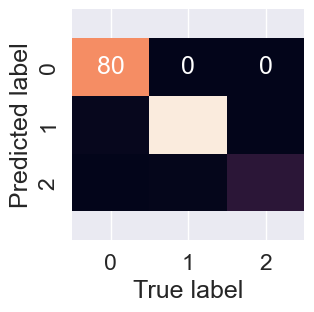

In [148]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [150]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       0.99      0.98      0.99       107
           2       1.00      0.92      0.96        13

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



In [152]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [154]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [156]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.915, 0.905, 0.91 , 0.915, 0.87 ])

In [158]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9029999999999999

In [160]:
from sklearn.metrics import make_scorer, precision_score
from sklearn.model_selection import cross_val_score

# Custom scorer with zero_division set
scorer = make_scorer(precision_score, average="weighted", zero_division=1)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring=scorer)
print("Cross-validated Precision:", np.mean(cv_precision))


Cross-validated Precision: 0.9106603387078124


In [162]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall_weighted")

cv_recall = np.mean(cv_recall)
print("Cross-validated Recall:", cv_recall)


Cross-validated Recall: 0.9029999999999999


In [164]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1_weighted")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705679596397639

In [176]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [178]:
# Check coef_
clf.coef_

array([[-3.86546191e+00, -1.04121071e+00, -1.69404532e-01,
        -1.61364667e+00, -2.45478514e-01, -6.23976295e-02,
        -1.35065208e-01,  1.55665404e-01, -3.72326431e-03,
        -2.23016124e-02,  1.39398436e-01, -1.88141279e-01],
       [ 9.80223204e-01,  3.59070788e-01,  3.82333430e-02,
         4.65457234e-01, -8.51481132e-02,  8.20963109e-02,
         5.18051371e-02, -1.15417007e-01, -1.05482097e-01,
        -3.86386893e-02, -9.56017246e-02,  1.18100299e-01],
       [ 1.74001702e+00,  3.40771354e-01,  9.95285714e-02,
         5.98735104e-01,  3.26784629e-01, -9.07685246e-02,
         6.85353373e-02,  5.43757922e-02,  1.55404792e-01,
         8.58078461e-02,  3.46478114e-02, -6.02949915e-02]])

In [180]:
# Match coef's of features to columns
feature_dict = dict(zip(df_reduced.columns, list(clf.coef_[0])))
feature_dict

{'PM2.5': -3.8654619094591447,
 'NO2': -1.0412107123689414,
 'SO2': -0.16940453172620473,
 'CO': -1.6136466705938777,
 'O3': -0.24547851376938068,
 'Temperature': -0.06239762949695466,
 'Humidity': -0.13506520848457668,
 'WindSpeed': 0.15566540437289386,
 'WindDirection': -0.0037232643143192455,
 'TimeOfDay': -0.02230161238124435,
 'DayOfWeek': 0.1393984364181115,
 'Pressure': -0.18814127895102237}

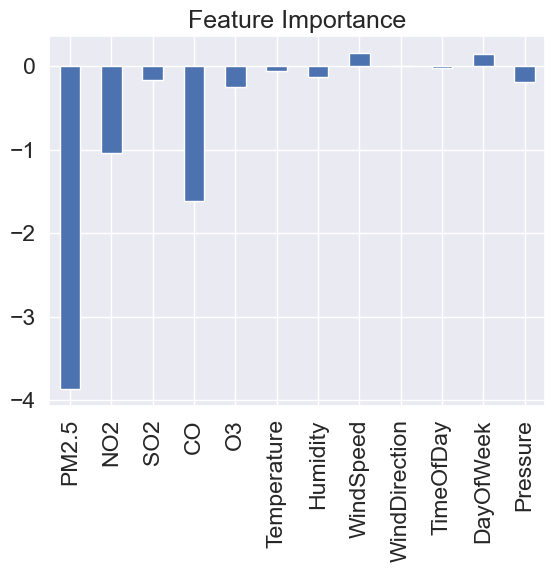

In [182]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [184]:
import joblib

# Save to disk
joblib.dump(final_model, "final_model.pkl")
print("📦 Final model saved as 'final_model.pkl'")


📦 Final model saved as 'final_model.pkl'
